# Homework assignment 5 - Neural Networks

## Before you begin

Remember to:

1. Make your own copy of the notebook by pressing the "Copy to drive" button.
2. Expend all cells by pressing **Ctrl+[**

### Your IDs

✍️ Fill in your IDs in the cell below:

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Fill in your IDs (as a string)
student1_id = '205736986'
student2_id = '316315407'
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print('Hello ' + student1_id + ' & ' + student2_id)

Hello 205736986 & 316315407


## Tip of the day - Debugging with PDB (optional, for the advanced users):

One of the main problems in working with Colab / Jupyter is the lack of a good debugger.

A not so optimal solution (but sometimes better than nothing) is to use Python's built-in debugger. Python comes with a very basic command line based debugger called [PDB](https://docs.python.org/3/library/pdb.html). It has all the basic debugger capabilities but is missing a good interface.

You can drop into debug mode in the middle of any Python code simply by placing the command **pdb.set_trace()** before the line which you want to debug (only after importing the **pdb** package). Once in debug mode, the debugger prompt will appear in which you can use the following commands:

- __l__ or **list**: to print the current line and the surrounding code.
- __n__ or **next**: to run the current line.
- __c__ or **continue**: to continue running until a breakpoint or until the end of the function.
- __q__ or **quit**: to stop the run and exit the debugger.
- **b {number}**: Place a breakpoint in line {number}.
- **!{python expression}**: to run any python expression.

(This is only a partial list of the PDB's commands. For the full list of commands you can refer to the [official documentation](https://docs.python.org/2/library/pdb.html#debugger-commands), or at [this cheat sheet](https://kapeli.com/cheat_sheets/Python_Debugger.docset/Contents/Resources/Documents/index))

Let us look at an example:

- Add the line **pdb.set_trace()** to the following code just before the **x *= 4**  line, and execute the cell to drop into debug mode.
- You should see a textbox next to a "ipdb>" prompt.
- Type __l__ (followed by **Enter**) to print the current line and surrounding code.
- Type **!print(x)** to print the value of the variable __x__ (you can also omit the print command and just use **!x** in this case).
- Type **!x=2** to change the value of __x__.
- Type **!print(x)** again.
- Type __n__ execute the next line.
- Type __l__ again.
- Type **!print(x)** again.
- Type **b 10** to place a breakpoint on the **return x** line.
- Type __c__ to run the code until the breakpoint.
- Type __l__ again.
- Type **!print(x)** again.
- Type __c__ or **q** to quit the debugger with or without finishing to run the code
- After you finish playing with the debugger make sure you remove or comment out the **pdb.set_trace()** line.
- Clear our all the debugger output (before submitting the code). You can do so, for example, by pressing the __X__ button left to the cell's output area.

In [ ]:
import pdb

def func(x):
    x += 2
    x *= 4
    x -= 2
    x /= 2
    
    return x

print(func(3))

9.0


### !! Important

- The **pdb.set_trace()** command can be placed anywhere, but stepping through the code (using the **n** command) is only possible inside functions.
- **You must exit the debugger** (using __c__ or **q**) in order to be able to run any other cells.

### Importing Packages

Importing the NumPy, Pandas and Matplotlib packages.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## This line makes matplotlib plot the figures inside the notebook
%matplotlib inline

## Set some default values of the the matplotlib plots
plt.rcParams['figure.figsize'] = (8.0, 8.0)  # Set default plot's sizes
plt.rcParams['axes.grid'] = True  # Show grid by default in figures

## The tqdm Package - Adding  a Progress Bar

When running a long calculation, we would usually want to have a progress bar to track the progress of our process. One great python package for creating such a progress bar is [**tqdm**](https://github.com/tqdm/tqdm). This package is easy to use and offers a highly customizable progress bar. 

For example, to add a progress bar to an existing loop, simply surrounding the iterable which the loops run over with the **tqdm.tqdm** command:

```python
import tqdm.notebook as tqdm
for x in tqdm.tqdm(some_list):
    some_long_running_function(x)
```

(The "import tqdm.notebook as tqdm" imports a version of tqdm which is fitted to run in a notebook).

✍️ Add a progress bar to the following loop:

In [ ]:
import tqdm.notebook as tqdm
import time

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
for i in tqdm.tqdm(range(1,10)):
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    print('Step {}'.format(i))
    time.sleep(1)

  0%|          | 0/9 [00:00<?, ?it/s]

Step 1
Step 2
Step 3
Step 4
Step 5
Step 6
Step 7
Step 8
Step 9


## Graphical Processing Unit (GPU)

GPUs are special processing cards which were originally developed to for accelerating graphical related calculations such as 3D rendering and playing a high-resolution video. Today these cards are also in use for a variety of tasks which are not necessarily graphic related, such as training neural networks.

These GPUs are optimal for running task which can be parallelized on a large amount of data. The CPU (Central Processing Unit) is the computer's main processing unit and usually has a smal number of fast and "strong" processing components called cores (today usually between 4 and 64). As opposed to it, a GPUs has many (usually thousands of) slower and "weaker" processing components.

When running a process which performs some mathematical operation to a large amount of data, for example calculating the $e^x$ for each element in a large matrix or a multiplication between two matrices, we can speed up our process significantly by running it on a GPU.

The GPU does not share the same memory space with the CPU and has its own memory. Therefore, before performing any calculation using a GPU, we must first transfer our data to the GPU's memory.

### Colab and GPUs

In this assignment, we will use a GPU to train our network. Colab offers free GPU support, but it is not enabled by default. To enable it, go to the menu bar, open **Runtime->Change runtime type** and change **hardware accelerator** to GPU. Click **save** to save your selection.

In this assignment you will see how we can use a package called **PyTorch** in order to tell our code to perform an operation on the GPU instead of on the CPU. 

## PyTorch

PyTorch is a framework (a collection of tools) which significantly simplify the process of building and training neural networks. This framework was initially developed and is currently maintained by Facebook. PyTorch is only one of many great such frameworks which currently exist. A list of some of the popular frameworks used today can be found [on Nvidia's site, here](https://developer.nvidia.com/deep-learning-frameworks).

Specifically, in this assignment, we will relay on PyTorch for the following features:
- The package's ability to automatic calculate gradients (using back-propagation)
- The package's ability to move a variable to the GPU and perform calculations on it.
- The package's stochastic gradient descent optimization object.
- The built-in objects/function for building and training models:
    - Linear layer
    - Convolutional layers
    - Relu
    - SoftMax
    - Minus-logLikelihood loss
 
In this assignment, we will **not** cover all of what is needed for using PyTorch. It is aimed to show you the basics idea of what the framework has to offer. To better understand PyTorch, a good place to start are the great tutorials on the package's [website](https://pytorch.org/tutorials/index.html). The "60 Minute Blitz" along with the "Learning PyTorch with Examples" on the website provide a great starting point.

### Tensors

The basic PyTorch object is the tensor with has a very similar (but not exact) interface to that of the NumPy array. A few differences which are worth mentioning:
- Tensors do not yet support the "@" operator of performing matrix multiplication. It is performed by using  **torch.matmul(a_mat, b_mat)**.
- The transpose of a matrix is given by  **a_mat.t()** (instead of the **a_mat.T** method which is in use in numpy)

For example:

In [ ]:
import torch  ## importing PyTorch

## Defining a tensor from lists of numbers
x1 = torch.tensor([[1.,2.], [3., 4.]])
print('x1=\n{}\n'.format(x1))

## Creating a random tensor
x2 = torch.randint(low=0, high=10, size=(2, 3)).float()
print('x2=\n{}\n'.format(x1))

## Multipliing tensors
y = torch.matmul(x1.t(), x2)
print('torch.matmul(x1.t(), x2)=\n{}'.format(y))

x1=
tensor([[1., 2.],
        [3., 4.]])

x2=
tensor([[1., 2.],
        [3., 4.]])

torch.matmul(x1.t(), x2)=
tensor([[16., 12., 21.],
        [22., 18., 34.]])


### An Important Comment About Single & Double Precision & Fixed Points

By default, numpy uses 64 bit to store floating point numbers. This representation is optimal for most CPUs. In contrast to that, PyTorch uses 32 bits, which is optimal for most GPUs. The 64-bit representation is called **double precision**, and the 32-bit is called **single precision**.

Most of PyTorch's operations can only be performed only between two tensors of the same type. Therefore we will need to make sure that all of our tensors will be stored using single precision. You can convert a tensor to single precision representation by using the tensors **.float()** command.

For some of the operations, we will also need to convert fixed point tensors (integers) to single precision. This is done in a similar way using the **.float()** command.

For example:

In [ ]:
## This is a fixed point tensor
x_int = torch.tensor([4, 2, 3])
print('x_int=\n{}'.format(x_int))
print('x_int.dtype={}\n'.format(x_int.dtype))

## Converting the tensor to single persicion
x_single = x_int.float()
print('x_single=\n{}'.format(x_single))
print('x_single.dtype={}\n'.format(x_single.dtype))

## Converting the tensor to double persicion
x_doubel = x_int.double()
print('x_doubel=\n{}'.format(x_doubel))
print('x_doubel.dtype={}\n'.format(x_doubel.dtype))

x_int=
tensor([4, 2, 3])
x_int.dtype=torch.int64

x_single=
tensor([4., 2., 3.])
x_single.dtype=torch.float32

x_doubel=
tensor([4., 2., 3.], dtype=torch.float64)
x_doubel.dtype=torch.float64



### PyTorch and GPUs
PyTorch provides a simple way to copy a tensor to the GPU's memory. The GPUs In PyTorch are referred to as [**CUDA**](https://en.wikipedia.org/wiki/CUDA) devices (which is the popular programing language for writing code for the GPU). A tensor can be copied to the GPU's memory by using the tensor's **.cuda** command. All the mathematical operations can then be performed on the copied tensor in the same way as if it was in the regular memory. The result of a calculation which was performed on the GPU will be stored on the GPU's memory as well.

A tensor can be copied back from the GPU's memory to the regular memory using the **.cpu** command. For example:

In [ ]:
## Moving x1 to the GPU
x1_gpu = x1.cuda()
print('x1_gpu=\n{}\n'.format(x1_gpu))

## Moving x2 to the GPU
x2_gpu = torch.randint(low=0, high=10, size=(2, 3)).float().cuda()
print('x2_gpu=\n{}\n'.format(x2_gpu))

## Performing matrix multiplication on the GPU
y = torch.matmul(x1_gpu.t(), x2_gpu)
print('torch.matmul(x1_gpu.t(), x2_gpu)=\n{}\n'.format(y))

print('y.cpu()=\n{}'.format(y.cpu()))

x1_gpu=
tensor([[1., 2.],
        [3., 4.]], device='cuda:0')

x2_gpu=
tensor([[9., 3., 3.],
        [1., 5., 6.]], device='cuda:0')

torch.matmul(x1_gpu.t(), x2_gpu)=
tensor([[12., 18., 21.],
        [22., 26., 30.]], device='cuda:0')

y.cpu()=
tensor([[12., 18., 21.],
        [22., 26., 30.]])


Notice the **device='cuda:0'** which is attached to the outputs of tensors which are stored on the GPU's memory.

✍️ Calculate the multiplication table (לוח הכפל ($\left[1,2,\ldots,10\right]^T\left[1,2,\ldots,10\right]$)) on the GPU, copy the result back to the CPU and print the result:
- PYTorch cannot multiply fixed point tensor on the GPU. Therefore so make sure you convert the tensors to single precision tensors.

In [ ]:
digits = torch.tensor([[1, 2, 3, 4, 5, 6, 7 ,8, 9, 10]]).float().cuda()
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
mult_table = torch.matmul(digits.t(), digits).cpu()
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

print(mult_table)

tensor([[  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.],
        [  2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.],
        [  3.,   6.,   9.,  12.,  15.,  18.,  21.,  24.,  27.,  30.],
        [  4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.],
        [  5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.],
        [  6.,  12.,  18.,  24.,  30.,  36.,  42.,  48.,  54.,  60.],
        [  7.,  14.,  21.,  28.,  35.,  42.,  49.,  56.,  63.,  70.],
        [  8.,  16.,  24.,  32.,  40.,  48.,  56.,  64.,  72.,  80.],
        [  9.,  18.,  27.,  36.,  45.,  54.,  63.,  72.,  81.,  90.],
        [ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]])


### Calculating gradients

One of PyTorch's main features is its ability to automatically calculate gradients by using back-propagation.

To calculate the gradient of a function, we need to preforme the following steps:

1. Select the variables according to which we would want to calculate the derivative.
2. Clear all previous gradient calculations.
3. Calculate the result of the functions for a given set of variables. (the forward path)
4. Run the back-propagation function starting from the calculated result of the function.

Let us start with an example, and then explain it.

The following code calculates the following derivative: $\left.\frac{\partial}{\partial x}x^2+5x+4\right|_{x=3}$:


In [ ]:
## Define the variables which we would want to calculate the derivative according to
x = torch.tensor(3).float()
x.requires_grad = True

## Calculate the function's result (forward pass)
y = x ** 2 + 5 * x + 4

## Run back-propagation
y.backward()

## Prin the result
x_grad = x.grad
print('The derivative is: {}'.format(x_grad))

The derivative is: 11.0


In the above cell, we have performed the following steps:

1. We have first defined a tensor **x**, and then marked be setting it's **.requires_grad** field to **True**. This tells PyTorch that we will later want to calculate the derivative according to it.
2. We have calculated the function's result (this is the forward pass).
3. We have used the result of the function to initiate the back-propagation calculation by using the **.backword()** function of the result tensor.

After the back-propagation step, the derivative of the function according to each one of the selected variables will be stored in the **.grad** field of each of the variables.

In this case, we did not have to clear any previous calculation since we did yet run any backward calculation using these variables.

✍️ Calculate and plot the derivative of the sigmoid function $\frac{1}{1+e^{-x}}$

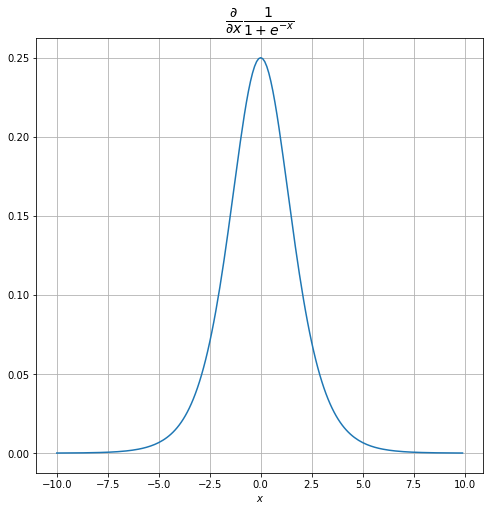

In [ ]:
vals = np.arange(-10, 10, 0.1)
res = np.zeros_like(vals)
for i in range(len(vals)):
    
    x = torch.tensor(vals[i]).float()
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    x.requires_grad = True
    y = 1/(1+torch.exp(-x))
    y.backward()
    res[i] = x.grad
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

fig, ax = plt.subplots()
ax.plot(vals, res);
ax.set_title('$\\frac{\\partial}{\\partial x}\\frac{1}{1+e^{-x}}$', fontsize=20)
ax.set_xlabel('$x$');

## Loading the Digits Dataset

We will use again the digits dataset from the last assignment.

Number of images in the dataset: 1797
Each images size is: (8, 8)
These are the first 80 images:


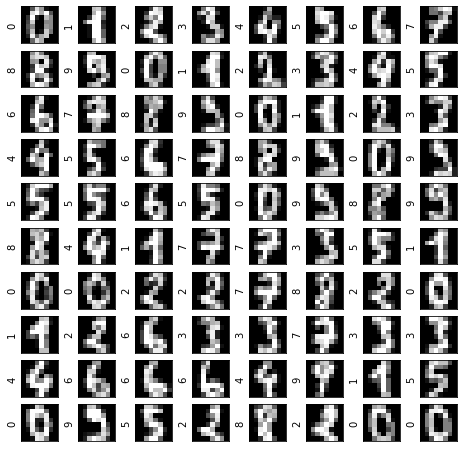

In [ ]:
from sklearn.datasets import load_digits
dataset = load_digits()

x = dataset.images
y = dataset.target

print('Number of images in the dataset: {}'.format(len(x)))
print('Each images size is: {}'.format(x.shape[1:]))
print('These are the first 80 images:')

fig, ax_array = plt.subplots(10, 8)
for i, ax in enumerate(ax_array.flat):
    ax.imshow(x[i], cmap='gray')
    ax.set_ylabel(y[i])
    ax.set_yticks([])
    ax.set_xticks([])

## Train-Validation-Test split

✍️ Complete the code below to split the data into 60% train 20% validation set set and 20% test set similar to the last assignment

In [ ]:
n_samples = x.shape[0]  # The total number of samples in the dataset

## Generate a random generator with a fixed seed
rand_gen = np.random.RandomState(0)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
## Generating a shuffled vector of indices
indices = np.arange(n_samples)
rand_gen.shuffle(indices)

## Split the indices into 60% train / 20% validation / 20% test
n_samples_train= int(n_samples * 0.8)
n_samples_val = int(n_samples_train * 0.2)
train_full_indices = indices[:n_samples_train]
train_indices=train_full_indices[n_samples_val:-1]
val_indices = train_full_indices[:n_samples_val]
test_indices = indices[n_samples_train:-1]
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Extract the sub datasets from the full dataset using the calculated indices
x_train = x[train_indices]
y_train = y[train_indices]
x_val = x[val_indices]
y_val = y[val_indices]
x_test = x[test_indices]
y_test = y[test_indices]

## Linear Logistic Regression

We will start by rewriting the linear logistic regression model from last assignment using PyTorch.

**Reminder**: We are modeling the conditional distribution of the labels as:

The way define and train models in PyTorch is by creating a class (which inherits the class of *torch.nn.Module*) and has two methods:

- **\_\_init\_\_**: Which initialize the models layers with their parameters.
- **forward**: which implements the model's functionality.

We will implement the class using the following objects / functions from PyTorch:

- [**torch.nn.Linear**](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear): defines a linear layer with its parameters, $\Theta$. It is defined by the number of **input_features**, the number of **output_features**.
- [**torch.nn.functional.log_softmax**](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.log_softmax) which implements the log-softmax function.

In [ ]:
class LinearLogisticRegression(torch.nn.Module):
     
    def __init__(self, in_features, out_features):   
        super(LinearLogisticRegression, self).__init__()
        
        ## Defining the linear function with it's parameters
        ## =================================================
        self.linear = torch.nn.Linear(in_features=in_features, out_features=out_features)
    
    def forward(self, x):
        x = x.view(x.shape[0], x.shape[1] * x.shape[2])
        z = self.linear(x)
        y = torch.nn.functional.log_softmax(z, dim=1)
        
        return y

## Mini-Batch Gradient Decent

In order to run over the dataset using mini batches PyTorch offers the class of [**torch.utils.data.DataLoader**](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) which receives a PyTorch dataset and generates a series of batches running over the dataset.

To generate a PyTorch dataset from a tensor of x and a tensor of y we will used the following command:

```python
torch.utils.data.TensorDataset(x, y)
```

We will convert x_train into a float tensor and y_train into a long integer tensor.

In [ ]:
batch_size = 64
train_set = torch.utils.data.TensorDataset(torch.tensor(x_train).float(), torch.tensor(y_train).long())
train_loader = torch.utils.data.DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True)

The following function implement mini-batch gradient descent using:

- The built-in optimization object [**torch.optim.SGD**](https://pytorch.org/docs/stable/optim.html#torch.optim.SGD) which performs gradient descent steps on a given set of parameters.
- The built-in loss function [**torch.nn.functional.nll_loss**](https://pytorch.org/docs/stable/nn.html#torch.nn.functional.nll_loss) which calculates the negative log-likelihood of a matrix of log-probabilities, $P$, and a vector of labels, $\boldsymbol{y}$ : $-\frac{1}{N}\sum_iP_{i,y_i}$

  0%|          | 0/10 [00:00<?, ?it/s]

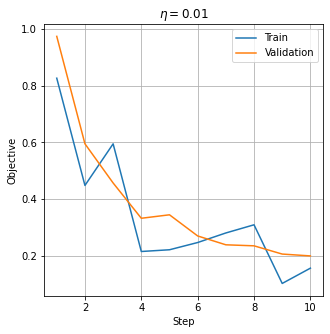

In [ ]:
def train(model, eta, n_epochs, train_loader, x_val, y_val):
    ## Move validation set to the GPU
    x_val = x_val.cuda()
    y_val = y_val.cuda()
    
    ## Initizalie the optimizer
    optimizer = torch.optim.SGD(model.parameters(), lr=eta)

    ## Prepare lists to store intermediate obejectives
    train_objective_list = [np.inf]
    val_objective_list = [np.inf]
    
    ## Run for n_epochs
    for epoch in tqdm.tqdm(range(n_epochs)):
        ## Run over the batches
        for x, y in train_loader:

            ## Move batch to GPU
            x = x.cuda()
            y = y.cuda()
            
            optimizer.zero_grad()
            ## Forward pass
            py_hat = model(x)
            objective = torch.nn.functional.nll_loss(py_hat, y)
            ## Backward pass
            objective.backward()
            ## Preform the gradient descent step
            optimizer.step()
    
        ## Evaluate the objective on the validation set
        with torch.no_grad(): ## This tell PyTorch not to calculate the gradients to save time
            train_objective_list.append(objective.item())

            py_hat = model(x_val)
            objective = torch.nn.functional.nll_loss (py_hat, y_val)
            val_objective_list.append(objective.item())

    return train_objective_list, val_objective_list

## Test the train function
eta = 0.01
n_epochs = 10
model = LinearLogisticRegression(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.legend();

### Selecting the learning rate

✍️ Complete the following code to plot the training figure (of the train and validation objectives over as a function of the number of steps) for the following learning rates: $[10^{-1},3\cdot10^{-2},10^{-2},3\cdot10^{-3}]$

-Use: n_epochs = 100.

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

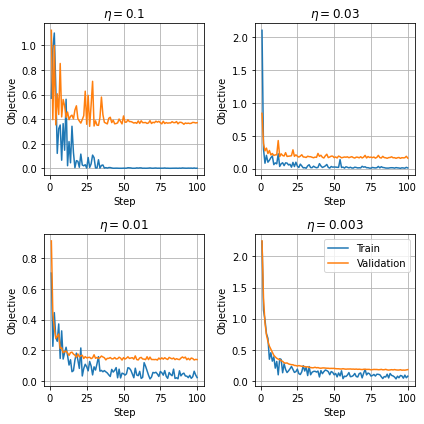

In [ ]:
n_epochs = 100
etas_list = (1e-1, 3e-2, 1e-2, 3e-3)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i_eta, eta in enumerate(etas_list):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    model = LinearLogisticRegression(in_features=x_train.shape[1] * x_train.shape[2], out_features=10).cuda()
    train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())
    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    ## Plot
    ax = axes.flat[i_eta]
    ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
    ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
    ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
    ax.set_xlabel('Step')
    ax.set_ylabel('Objective')
axes[1,1].legend()
fig.tight_layout()

Select the largest learning rate $\eta$ in which the validation graph does not have large spikes (>0.1).

✍️ Fill in the code below to select the learning rate and retrain the model for 500 epochs.

  0%|          | 0/500 [00:00<?, ?it/s]

(0.0, 0.5)

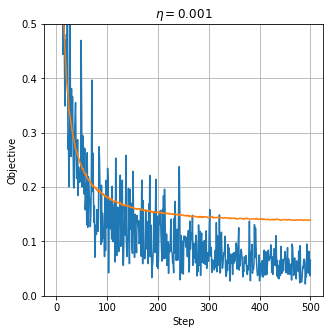

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
eta = 0.001
n_epochs = 500
model = LinearLogisticRegression(in_features=x_train.shape[1] * x_train.shape[2], out_features=10).cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 0.5)


### Early Stopping

We would like to stop the training when the validation objective reaches its minimum.

✍️ Fill in the code below to rerun the training for the number of epoch which brings the validation objective to its minimum

486


  0%|          | 0/486 [00:00<?, ?it/s]

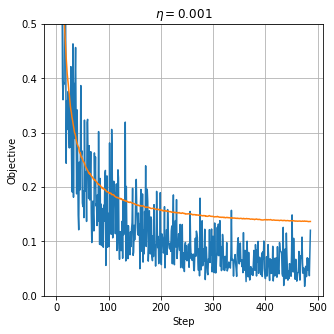

In [ ]:
optimal_number_of_steps = np.argmin(val_objective_list)
print(optimal_number_of_steps)

## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
model = LinearLogisticRegression(in_features=x_train.shape[1] * x_train.shape[2], out_features=10).cuda()
train_objective_list, val_objective_list = train(model, eta, optimal_number_of_steps, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 0.5);

### Evaluating the Model on the Test Set

The following code calculates the misclassification rate on the test set.

In order to so we will define a data loader on the test set.

In [ ]:
test_set = torch.utils.data.TensorDataset(torch.tensor(x_test).float(), torch.tensor(y_test).long())
test_loader = torch.utils.data.DataLoader(dataset=test_set, batch_size=batch_size)

## Evaluate the score on the test set
with torch.no_grad():
    test_score_list = []
    for x, y in test_loader:
        x = x.cuda()
        y = y.cuda()

        y_hat = model(x)
        test_score = (torch.argmax(y_hat, dim=1) != y).sum()

        test_score_list.append(test_score.item())

test_score = np.sum(test_score_list) / len(test_set)

print(f'The test score is: {test_score:.3}')

The test score is: 0.0223


## MLP

Now that we have a training function and we know how to define models using PyTorch, we can start playing around with some neural-networks architectures. 

Specifically, we will run one MLP network and one CNN network.

✍️ Complete the code below to define an MLP with 2 hidden layer of 1024 neurons and a ReLU activation function.

I.e., build a network which with of the following layers:

- **fc1**: A fully connected (linear) layer with an input of the in_features and output of 1024 with a ReLU activation.
- **fc2**: A fully connected of 1024x1024 + ReLU.
- **fc3**: A fully connected of 1024xout_features.
- A softmax function

In our case:

- in_features = 64*64
- out_features = 10

We will use the function [**torch.nn.functional.relu**](https://pytorch.org/docs/stable/nn.functional.html#torch.nn.functional.relu) to implement the ReLU activation.

  0%|          | 0/10 [00:00<?, ?it/s]

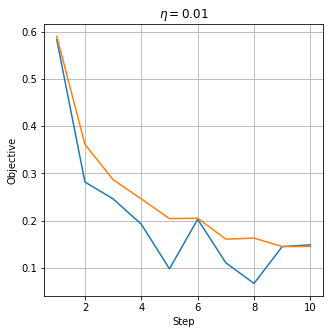

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
class MLP(torch.nn.Module):

    def __init__(self, in_features, out_features):   
        super(MLP, self).__init__()
        
        ## Defining the fully connected (linear) layers with their parameters
        ## ==================================================================
        self.linear1 = torch.nn.Linear(in_features=in_features, out_features=1024, bias=True)
        self.linear2 = torch.nn.Linear(in_features=1024, out_features=1024, bias=True)
        self.linear3 = torch.nn.Linear(in_features=1024, out_features=out_features, bias=True)

    def forward(self, x):
        x = x.view(x.shape[0], x.shape[1] * x.shape[2])
        z = self.linear1(x)
        z = torch.nn.functional.relu(z)
        z = self.linear2(z)
        z = torch.nn.functional.relu(z)
        z = self.linear3(z)
        y = torch.nn.functional.log_softmax(z, dim=1)
        return y
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Test the train function
eta = 0.01
n_epochs = 10
model = MLP(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective');

### Selecting the learning rate

✍️ Complete the following code to plot the training figure (of the train and validation objectives over as a function of the number of steps) for the following learning rates: $[10^{-1},3\cdot10^{-2},10^{-2},3\cdot10^{-3}]$

-Use: n_epochs = 30.

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

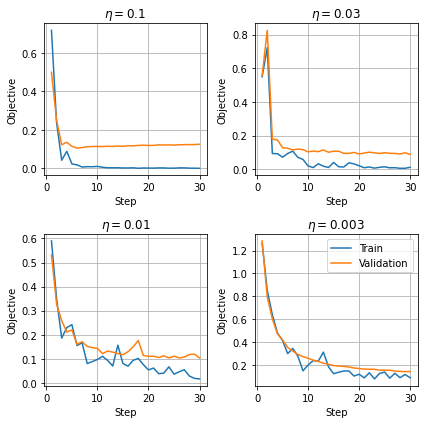

In [ ]:
n_epochs = 30
etas_list = (1e-1, 3e-2, 1e-2, 3e-3)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i_eta, eta in enumerate(etas_list):
    ## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
    model = MLP(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
    model = model.cuda()
    train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())

    ## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%
    
    ## Plot
    ax = axes.flat[i_eta]
    ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
    ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
    ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
    ax.set_xlabel('Step')
    ax.set_ylabel('Objective')
axes[1,1].legend()
fig.tight_layout()

✍️ Use $\eta=0.003$ and fill in the code below to train the model for 2000 epochs.

  0%|          | 0/2000 [00:00<?, ?it/s]

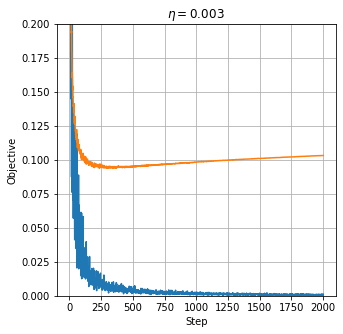

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
eta = 0.003
n_epochs = 2000
model = MLP(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())

## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 0.2);

### Early Stopping

We would like to stop the training when the validation objective reaches its minimum.

✍️ Fill in the code below to rerun the training for the number of epoch which brings the validation objective to its minimum

343


  0%|          | 0/343 [00:00<?, ?it/s]

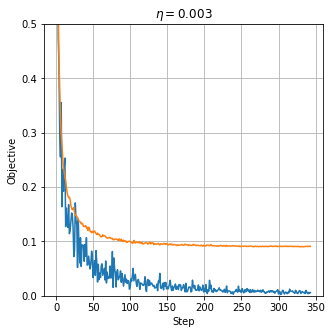

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
optimal_number_of_steps = np.argmin(val_objective_list)
print(optimal_number_of_steps)
model = MLP(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, optimal_number_of_steps, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective')
ax.set_ylim(0, 0.5);

### Evaluating the Model on the Test Set

In [ ]:
with torch.no_grad():
    test_score_list = []
    for x, y in test_loader:
        x = x.cuda()
        y = y.cuda()

        y_hat = model(x)
        test_score = (torch.argmax(y_hat, dim=1) != y).sum()

        test_score_list.append(test_score.item())

test_score = np.sum(test_score_list) / len(test_set)

print(f'The test score is: {test_score:.3}')

The test score is: 0.0167


## CNN

We will now also implement a CNN network.

✍️ Complete the code below to define a CNN which is composed of the following layers:

- **conv1**: A convolutional layer with a 3x3 kernel, 1 input channels, 64 output channels, a padding of 1 on each edge + ReLU.
- **conv2**: A convolutional layer with a 3x3 kernel, 64 input, 64 output, padding of 1, **stride of 2** + ReLU.
- **fc3**: A fully connected of (64\*4\*4)x256 + ReLU.
- **fc4**: A fully connected of 256x10.
- A softmax function

  0%|          | 0/10 [00:00<?, ?it/s]

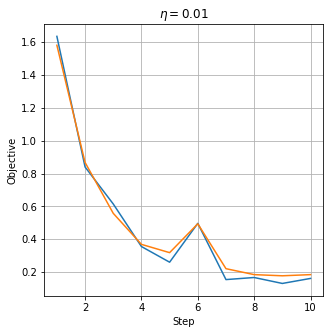

In [ ]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
class CNN(torch.nn.Module):

    def __init__(self, in_features, out_features):   
        super(CNN, self).__init__()
        
        ## Defining the convolutional and fully connected layers with their parameters
        ## ===========================================================================
        self.conv1 = torch.nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1, stride=2)
        self.fc3 = torch.nn.Linear(in_features=64 * 4 * 4, out_features=256, bias=True)
        self.fc4 = torch.nn.Linear(in_features=256, out_features=10, bias=True)
    
    def forward(self, x):
        x = x[:, None, :, :]
        
        z = self.conv1(x)
        z = torch.nn.functional.relu(z)
        z = self.conv2(z)
        z = torch.nn.functional.relu(z)
        z = z.view(z.shape[0], -1)
        z = self.fc3(z)
        z = torch.nn.functional.relu(z)
        z = self.fc4(z)
        y = torch.nn.functional.log_softmax(z, dim=1)
        
        return y
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

## Test the train function
eta = 0.01
n_epochs = 10
model = CNN(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                 torch.tensor(x_val).float(),
                                                 torch.tensor(y_val).long())

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective');

In [ ]:
n_epochs = 20
etas_list = (1e-1, 3e-2, 1e-2, 3e-3)

fig, axes = plt.subplots(2, 2, figsize=(6, 6))
for i_eta, eta in enumerate(etas_list):
    model = CNN(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
    model = model.cuda()
    train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                     torch.tensor(x_val).float(),
                                                     torch.tensor(y_val).long())
    
    ## Plot
    ax = axes.flat[i_eta]
    ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
    ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
    ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
    ax.set_xlabel('Step')
    ax.set_ylabel('Objective')
axes[1,1].legend()
fig.tight_layout()

✍️ Fill in the following cells to:

1. Use $\eta=0.003$ and fill in the code below to train the model for 1000 epochs.
2. Retrain the model using early stopping.
3. Calculate the misclassification on the test set.

Copy the code for plotting the objectives from the cells above.

  0%|          | 0/1000 [00:00<?, ?it/s]

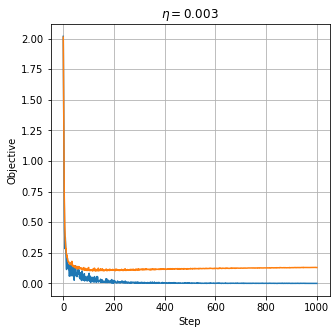

In [41]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
eta = 0.003
n_epochs = 1000
model = CNN(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, n_epochs, train_loader,
                                                  torch.tensor(x_val).float(),
                                                  torch.tensor(y_val).long())

## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective');
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

  0%|          | 0/129 [00:00<?, ?it/s]

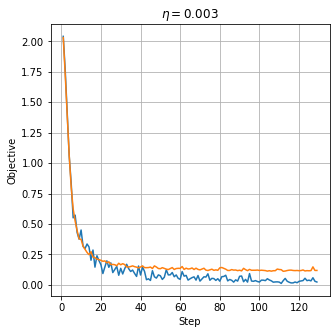

In [42]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
optimal_number_of_steps = np.argmin(val_objective_list)
model = CNN(in_features=x_train.shape[1] * x_train.shape[2], out_features=10)
model = model.cuda()
train_objective_list, val_objective_list = train(model, eta, optimal_number_of_steps, train_loader,
                                                  torch.tensor(x_val).float(),
                                                  torch.tensor(y_val).long())
## Plot
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(np.arange(len(train_objective_list)), train_objective_list, label='Train')
ax.plot(np.arange(len(val_objective_list)), val_objective_list, label='Validation')
ax.set_title(r'$\eta={' + f'{eta:g}' + r'}$')
ax.set_xlabel('Step')
ax.set_ylabel('Objective');
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

In [43]:
## %%%%%%%%%%%%%%% Your code here - Begin %%%%%%%%%%%%%%%
with torch.no_grad():
    test_score_list = []
    for x, y in test_loader:
        x = x.cuda()
        y = y.cuda()

        y_hat = model(x)
        test_score = (torch.argmax(y_hat, dim=1) != y).sum()

        test_score_list.append(test_score.item())

test_score = np.sum(test_score_list) / len(test_set)

print(f'The test score is: {test_score:.3}')
## %%%%%%%%%%%%%%% Your code here - End %%%%%%%%%%%%%%%%%

The test score is: 0.0195


In this case of a small image and a small dataset the CNN is not expected to perform better then the MLP.

## Reminder: Submission

To submit your code, download it as a **ipynb** file from Colab, and upload it to the course's website. You can download this code by selecting **Download .ipynb** from the **file** menu.